In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze dataset

In [2]:
def show_tables(database_file):
    # Connect to the SQLite database
    con = sqlite3.connect(database_file)
    cur = con.cursor()

    # Execute a query to get the table names
    cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

    # Fetch all the table names
    tables = cur.fetchall()

    # Close the cursor and connection
    cur.close()
    con.close()

    # Print the table names
    print("Tables in the database:")
    for table in tables:
        print(table[0])

show_tables('./sample.sqlite')

Tables in the database:
account
iap_purchase
account_date_session


In [3]:
def read_sqlite_to_dataframe(database_file, query):
    connection = sqlite3.connect(database_file)
    df = pd.read_sql_query(query, connection)
    connection.close()
    return df

# import db
database_file = './sample.sqlite'

# Queries Read data from each table
account_query = "SELECT account_id, created_time as create_account_time, created_device, created_platform, country_code FROM account;"
iap_purchase_query = "SELECT account_id, created_time as iap_buy_time, iap_price_usd_cents FROM iap_purchase;"
account_date_session_query = "SELECT account_id, date as session_date, session_count, session_duration_sec FROM account_date_session;"

# transform tables from sqlite to dataframe for processing
account_df = read_sqlite_to_dataframe(database_file, account_query)
iap_purchase_df = read_sqlite_to_dataframe(database_file, iap_purchase_query)
account_date_session_df = read_sqlite_to_dataframe(database_file, account_date_session_query)

In [4]:
print(account_df.head(5))
#print(account_df.dtypes)
check_null1 = account_df['account_id'].isnull().sum()
check_na1 = account_df['account_id'].isna().sum()
check_dup1 = account_df['account_id'].duplicated().sum()

    account_id      create_account_time created_device created_platform  \
0     13514010  2016-03-02 17:11:00.332      iPhone6,2              iOS   
1   4308483975   2016-03-02 20:57:46.14      MIDC147PJ          Android   
2  17193137415  2016-03-02 13:52:16.735       SM-G360F          Android   
3  21488104920  2016-03-02 12:43:27.899        H60-L01          Android   
4  21488107995  2016-03-02 17:20:12.145       GT-I9500          Android   

  country_code  
0           GB  
1           FR  
2           IT  
3           CN  
4           RU  


In [5]:
print(iap_purchase_df.head(5))
#print(iap_purchase_df.dtypes)
check_null2 = iap_purchase_df['account_id'].isnull().sum()
check_na2 = iap_purchase_df['account_id'].isna().sum()
check_dup2 = iap_purchase_df['account_id'].duplicated().sum()

    account_id             iap_buy_time  iap_price_usd_cents
0  30077202816  2016-03-26 23:59:59.355                  739
1  30077202816  2016-05-31 11:24:37.283                  369
2  21487283560  2016-02-13 03:40:28.644                  184
3  21487152816  2016-02-28 00:53:26.678                  184
4   8602037685  2016-02-11 01:03:04.727                  184


In [6]:
print(account_date_session_df.head(5))
#print(account_date_session_df.dtypes)
check_null3 = account_date_session_df['account_id'].isnull().sum()
check_na3 = account_date_session_df['account_id'].isna().sum()
check_dup3 = account_date_session_df['account_id'].duplicated().sum()

    account_id session_date  session_count  session_duration_sec
0  68730811144   2016-01-01              1                    47
1  68730812806   2016-01-01              1                   204
2  68730829426   2016-01-01             12                  4703
3  68730829426   2016-01-02              9                  4676
4  68730829426   2016-01-03              9                  2271


In [7]:
print(f"\n\tNumber of null, nan, duplicated values in account table: {check_null1}, {check_na1}, {check_dup1}")
print(f"\n\tNumber of null, nan, duplicated values in iap_purchase table: {check_null2}, {check_na2}, {check_dup2}")
print(f"\n\tNumber of null, nan, duplicated values in account_session table: {check_null3}, {check_na3}, {check_dup3}")


	Number of null, nan, duplicated values in account table: 0, 0, 0

	Number of null, nan, duplicated values in iap_purchase table: 0, 0, 8360

	Number of null, nan, duplicated values in account_session table: 0, 0, 1586523


In [8]:
from scipy.stats import zscore

# Calculate Z-score
purchases_z_scores = zscore(iap_purchase_df['iap_price_usd_cents'])
sessions_z_scores = zscore(account_date_session_df['session_count'])

# Identify outliers based on Z-score
purchases_outliers = iap_purchase_df[abs(purchases_z_scores) > 3]
sessions_outliers = account_date_session_df[abs(sessions_z_scores) > 3]

In [9]:
purchases_outliers['iap_price_usd_cents'].sort_values(ascending=False).head()

262     3699
6296    3699
7187    3699
7186    3699
7174    3699
Name: iap_price_usd_cents, dtype: int64

In [10]:
a_id = '30077202816'
specific_row = iap_purchase_df.loc[iap_purchase_df['account_id'] == a_id]
specific_row2 = account_df.loc[account_df['account_id'] == a_id]
specific_row3 = account_date_session_df.loc[account_date_session_df['account_id'] == a_id]
print("\n\tNumber Transactions: ", specific_row)
print("\n\tAccount: ", specific_row2)
print("\n\tLogin Sessions: ", specific_row3)


	Number Transactions:        account_id             iap_buy_time  iap_price_usd_cents
0    30077202816  2016-03-26 23:59:59.355                  739
1    30077202816  2016-05-31 11:24:37.283                  369
102  30077202816  2016-01-31 21:11:09.852                  739
103  30077202816  2016-01-31 21:45:53.605                  184

	Account:          account_id      create_account_time created_device created_platform  \
35593  30077202816  2016-01-23 06:12:59.956       SM-T210R          Android   

      country_code  
35593           US  

	Login Sessions:            account_id session_date  session_count  session_duration_sec
47386    30077202816   2016-01-23              5                  1796
47387    30077202816   2016-01-24             10                  5076
47388    30077202816   2016-01-25              7                  2372
47389    30077202816   2016-01-26              5                  1344
47390    30077202816   2016-01-27              6                  4529
...

# Top players sessions and Daily Active User (DAU)

In [11]:
#Group by account_id and agg session_count and session_duration_sec
player_metrics = account_date_session_df.groupby('account_id').agg({
    'session_count': 'sum',
    'session_duration_sec': 'sum'
}).reset_index()

#Rank players based on agg metrics
player_metrics['rank_session_count'] = player_metrics['session_count'].rank(ascending=False, method='min')
player_metrics['rank_session_duration'] = player_metrics['session_duration_sec'].rank(ascending=False, method='min')

#Rank top 20 players
top_players_by_sessions = player_metrics.nlargest(20, 'session_count')

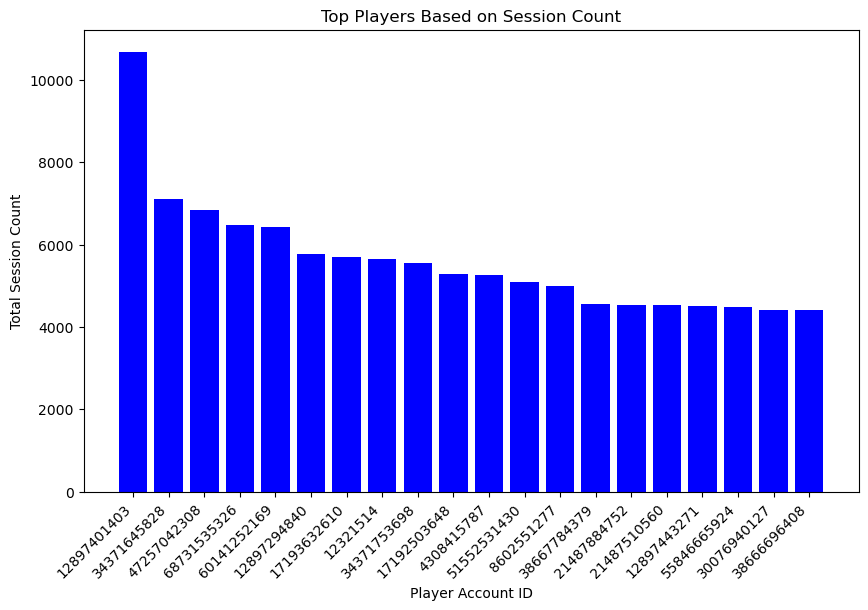

In [12]:
# The top players on a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_players_by_sessions['account_id'], top_players_by_sessions['session_count'], color='blue')
plt.title('Top Players Based on Session Count')
plt.xlabel('Player Account ID')
plt.ylabel('Total Session Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
top_players_by_sessions

,account_id,session_count,session_duration_sec,rank_session_count,rank_session_duration
1789,12897401403,10683,2427629,1.0,10.0
39708,34371645828,7100,3029838,2.0,4.0
67022,47257042308,6833,1848784,3.0,24.0
100490,68731535326,6486,1796640,4.0,30.0
86663,60141252169,6425,2077474,5.0,18.0
1603,12897294840,5776,1233836,6.0,98.0
16077,17193632610,5711,1679784,7.0,40.0
12,12321514,5653,2080382,8.0,17.0
39903,34371753698,5561,1839140,9.0,25.0
14237,17192503648,5295,2282602,10.0,13.0


.We can see that all top 20 players had more than 4000 sessions.

.The top one and second one were all from KR with impressive sessions, more than 10000 1st and 7100 for the second. But they were not use the game longest in their total sessions.

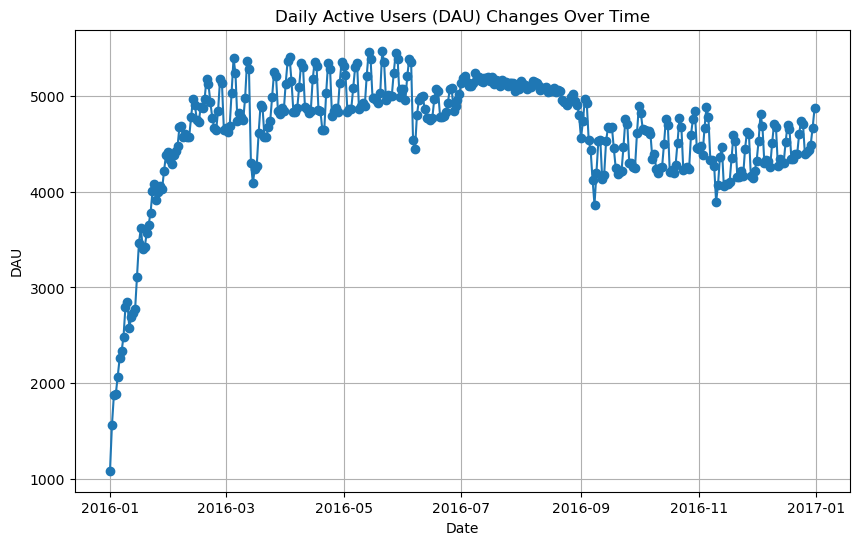

In [14]:
# Account sessions based on account
session_merged_df = pd.merge(account_date_session_df, account_df, on='account_id', how='left')

# Convert 'date_login' to datetime format
session_merged_df['session_date'] = pd.to_datetime(session_merged_df['session_date'])

# Calculate DAU
dau = session_merged_df.groupby('session_date')['account_id'].nunique()

# Plot the DAU changes over time
plt.figure(figsize=(10, 6))
plt.plot(dau.index, dau.values, marker='o', linestyle='-')
plt.title('Daily Active Users (DAU) Changes Over Time')
plt.xlabel('Date')
plt.ylabel('DAU')
plt.grid(True)
plt.show()

.The trend in daily active users (DAU) appears to be a gradual increase from January 2016 to July 2016, 
followed by a gradual decrease from July 2016 to January 2017. 

.The highest DAU is around 5000 in July 2016 and the lowest DAU is around 2000 in January 2016 1.

.In the period between July 2016 to early September 2016, DAU dropped a little bit but it still kept stable
above 5000 and there weren't much fluctuate like other periods. We can say that the game is very popular at this time.

.At September 2016 and November 2016, active users's sessions drop from its stable. I think maybe this is because the game released the event/update/something which makes most players didn't like and satisfy. DAU decreased a bit less than 4000 but increase immediately after these time. This is the proof that the game listened to players's complaints and fixed immediately.

.DAU kept increase trend after the two lowest points above and continued until the next year January 2017.

.In general about DAU, it had a significant increment in early 2016 and kept stable in the rest of year 2016.

# Revenue & number users purchased by countries

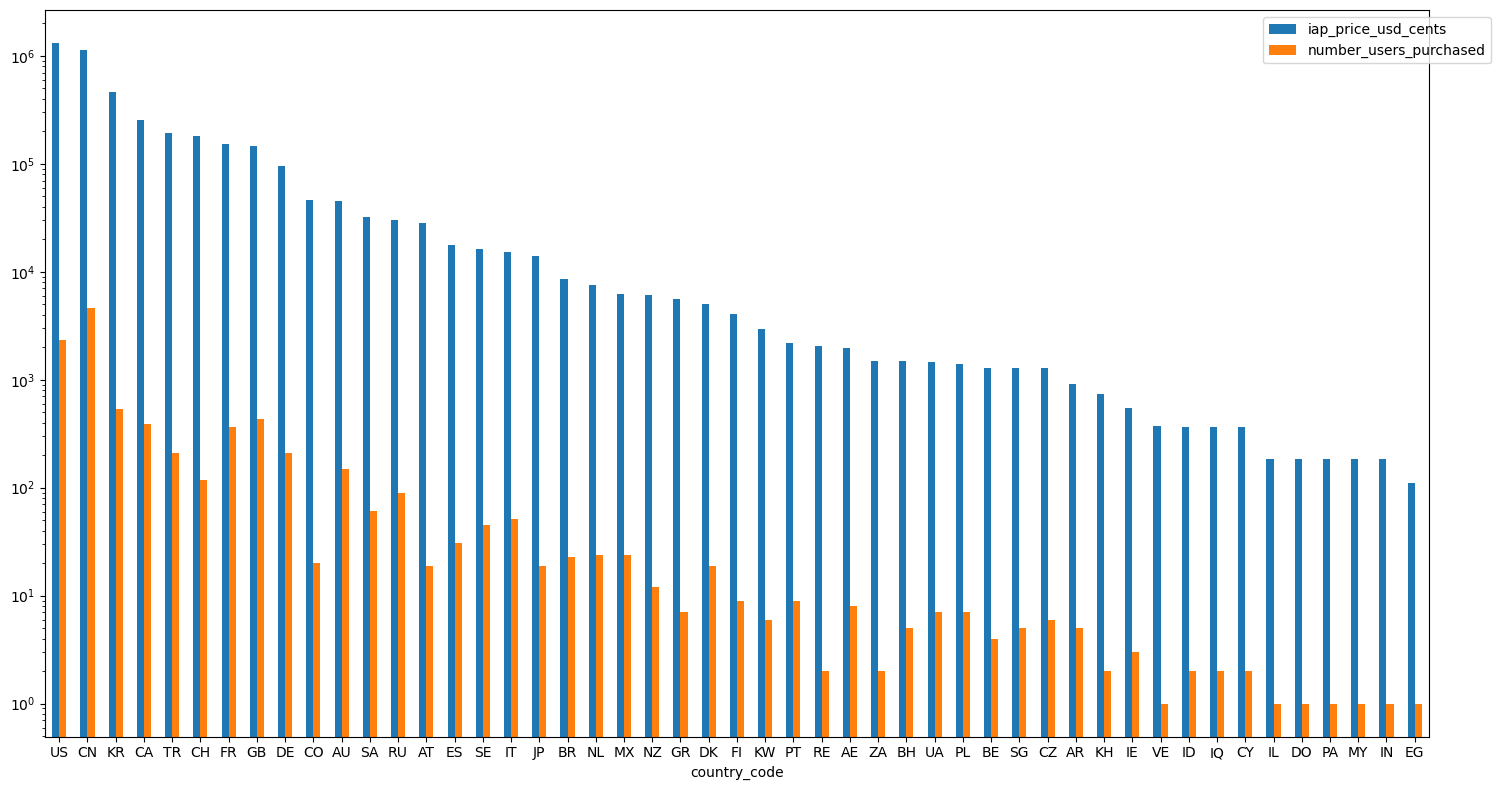

In [15]:
# Merge DataFrames based on 'account_id' who bought at least 1 time
purchases_merged_df = pd.merge(iap_purchase_df, account_df, on='account_id', how='left')

# Aggregate metrics by country
revenue_by_country = purchases_merged_df.groupby('country_code')['iap_price_usd_cents'].sum().sort_values(ascending=False).to_frame()
number_users_purchased_by_country = purchases_merged_df['country_code'].value_counts().rename_axis('country_code').reset_index(name='number_users_purchased')

df = pd.merge(revenue_by_country, number_users_purchased_by_country, on='country_code')

# Plot revenue by country
ax = df.plot(kind='bar', x='country_code', logy=True, rot=0, figsize=(15, 8))
ax.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.tight_layout()
plt.show()

In [16]:
a_id = '34371645828'
print(purchases_merged_df.loc[purchases_merged_df['account_id'] == a_id])

      account_id             iap_buy_time  iap_price_usd_cents  \
51   34371645828    2016-01-08 16:02:04.2                  739   
125  34371645828  2016-12-18 11:23:36.821                  739   

         create_account_time created_device created_platform country_code  
51   2016-01-01 02:29:39.352       SM-N916S          Android           KR  
125  2016-01-01 02:29:39.352       SM-N916S          Android           KR  


In [17]:
df.head(5)

,country_code,iap_price_usd_cents,number_users_purchased
0,US,1314818,2345
1,CN,1136507,4610
2,KR,463518,536
3,CA,254506,387
4,TR,193339,208


In [18]:
#revenue_by_country.head(5)

In [19]:
#number_users_purchased_by_country.head(5)

.US and CN were two dominent markets in 2016

.US players purchased more than CN players in total - more than 11k $ (iap_price_usd_cents / 100), but the number player of CN (4610) who purchased in game is x2 time to the number player of US (2345).

.KR and CA were two smaller markets but look like the game was still interested in these two countries. But at least the total amount 7k $ and attracted nearly 1000 players in total bought in game.

.Compare with the Top player sessions bar chart above that prove the game was very popular in KR with many players in 2016, although the biggest markets were US and CN.

.In general, in 2016, CN won the race in number users purchased in game. And US won the race total money purchased.

# Players by countries

In [20]:
purchases_merged_df.head(5)

,account_id,iap_buy_time,iap_price_usd_cents,create_account_time,created_device,created_platform,country_code
0,30077202816,2016-03-26 23:59:59.355,739,2016-01-23 06:12:59.956,SM-T210R,Android,US
1,30077202816,2016-05-31 11:24:37.283,369,2016-01-23 06:12:59.956,SM-T210R,Android,US
2,21487283560,2016-02-13 03:40:28.644,184,2016-01-16 10:20:55.576,"iPhone8,2",iOS,CN
3,21487152816,2016-02-28 00:53:26.678,184,2016-01-09 14:17:01.75,R7c,Android,CN
4,8602037685,2016-02-11 01:03:04.727,184,2016-01-02 00:16:50.865,SM-G360F,Android,GB


In [21]:
a_id1 = 'CN'
a_id2 = 'US'
a_id3 = 'KR'
a_id4 = 'CA'
print(purchases_merged_df.loc[purchases_merged_df['country_code'] == a_id1].count())
print(purchases_merged_df.loc[purchases_merged_df['country_code'] == a_id2].count())
print(purchases_merged_df.loc[purchases_merged_df['country_code'] == a_id3].count())
print(purchases_merged_df.loc[purchases_merged_df['country_code'] == a_id4].count())

account_id             4610
iap_buy_time           4610
iap_price_usd_cents    4610
create_account_time    4610
created_device         4610
created_platform       4610
country_code           4610
dtype: int64
account_id             2345
iap_buy_time           2345
iap_price_usd_cents    2345
create_account_time    2345
created_device         2345
created_platform       2345
country_code           2345
dtype: int64
account_id             536
iap_buy_time           536
iap_price_usd_cents    536
create_account_time    536
created_device         536
created_platform       536
country_code           536
dtype: int64
account_id             387
iap_buy_time           387
iap_price_usd_cents    387
create_account_time    387
created_device         387
created_platform       387
country_code           387
dtype: int64


In [22]:
#number_users_purchased_by_country
print(number_users_purchased_by_country.dtypes)
number_users_purchased_by_country.count()

country_code              object
number_users_purchased     int64
dtype: object


country_code              49
number_users_purchased    49
dtype: int64

In [23]:
print(revenue_by_country.dtypes)
revenue_by_country.count()

iap_price_usd_cents    int64
dtype: object


iap_price_usd_cents    49
dtype: int64

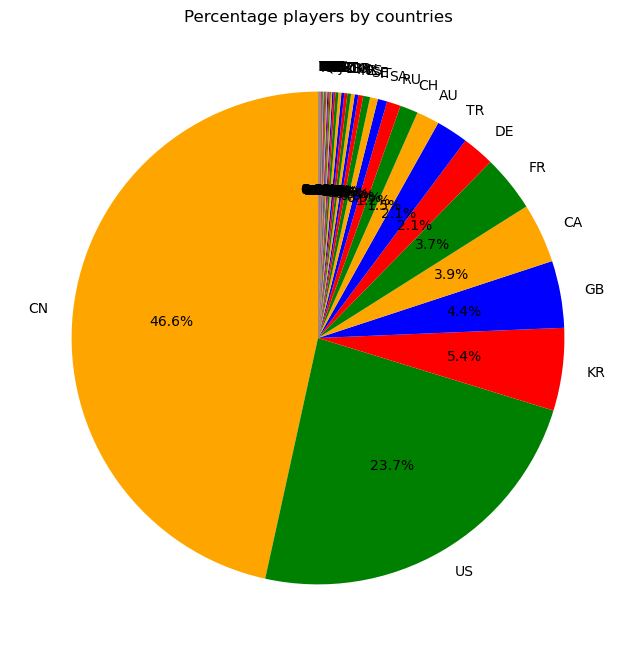

In [24]:
number_users_purchased_by_country = purchases_merged_df['country_code'].value_counts()
# Plot users by country
plt.figure(figsize=(20, 8))
plt.pie(number_users_purchased_by_country, labels=number_users_purchased_by_country.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'green', 'red', 'blue'])
plt.title('Percentage players by countries')
plt.show()

.As I mentioned above, CN players was more than US twice times. 

.CN players purchased is nearly ~50% to total profit of 2016, US is half lesser than CN with 23.7%.

.In other countries, number of players purchased in game is nearly ~30% in total.

In [25]:
session_merged_df.head(5)

,account_id,session_date,session_count,session_duration_sec,create_account_time,created_device,created_platform,country_code
0,68730811144,2016-01-01,1,47,2016-01-01 03:59:52.347,SM-G900V,Android,US
1,68730812806,2016-01-01,1,204,2016-01-01 05:15:58.094,NXA116QC164,Android,US
2,68730829426,2016-01-01,12,4703,2016-01-01 15:52:35.871,MotoG3,Android,CO
3,68730829426,2016-01-02,9,4676,2016-01-01 15:52:35.871,MotoG3,Android,CO
4,68730829426,2016-01-03,9,2271,2016-01-01 15:52:35.871,MotoG3,Android,CO


In [26]:
#purchases_merged_df = pd.merge(account_df, iap_purchase_df, on='account_id', how='right')
#session_merged_df = pd.merge(purchases_merged_df, account_date_session_df, on='account_id', how='left')
#purchases_merged_df = purchases_merged_df.dropna()
#session_merged_df = session_merged_df.dropna()

# Group by country and calculate total revenue and users
grouped_data = purchases_merged_df.groupby('country_code').agg({
    'iap_price_usd_cents': 'sum',
    'account_id': 'nunique'
}).reset_index()

grouped_data.columns = ['country_code', 'iap_price_usd_cents', 'number_unique_accounts_purchased']

# Calculate average revenue per user per market
grouped_data['avg_revenue_per_user'] = grouped_data['iap_price_usd_cents'] / grouped_data['number_unique_accounts_purchased']

# Group purchases count and sessions counts by countries
purchase_counts = purchases_merged_df.groupby('country_code')['account_id'].count().reset_index()
purchase_counts.rename(columns={'account_id': 'number_purchases_by_countries'}, inplace=True)
sessions_counts = session_merged_df.groupby('country_code')['account_id'].count().reset_index()
sessions_counts.rename(columns={'account_id': 'total_sessions_by_countries'}, inplace=True)

grouped_data = pd.merge(grouped_data, purchase_counts, on='country_code', how='left')
grouped_data = pd.merge(grouped_data, sessions_counts, on='country_code', how='left')

# Display the results
print("Average Revenue per User per Market:")
print(grouped_data.head(10))

Average Revenue per User per Market:
  country_code  iap_price_usd_cents  number_unique_accounts_purchased  \
0           AE                 1953                                 2   
1           AR                  920                                 2   
2           AT                28471                                 1   
3           AU                45066                                26   
4           BE                 1291                                 3   
5           BH                 1475                                 1   
6           BR                 8598                                 6   
7           CA               254506                                42   
8           CH               182774                                 9   
9           CN              1136507                               874   

   avg_revenue_per_user  number_purchases_by_countries  \
0            976.500000                              8   
1            460.000000                    

In [27]:
a_id = 'FI'
print(grouped_data.loc[grouped_data['country_code'] == a_id])

   country_code  iap_price_usd_cents  number_unique_accounts_purchased  \
18           FI                 4061                                 2   

    avg_revenue_per_user  number_purchases_by_countries  \
18                2030.5                              9   

    total_sessions_by_countries  
18                         3044  


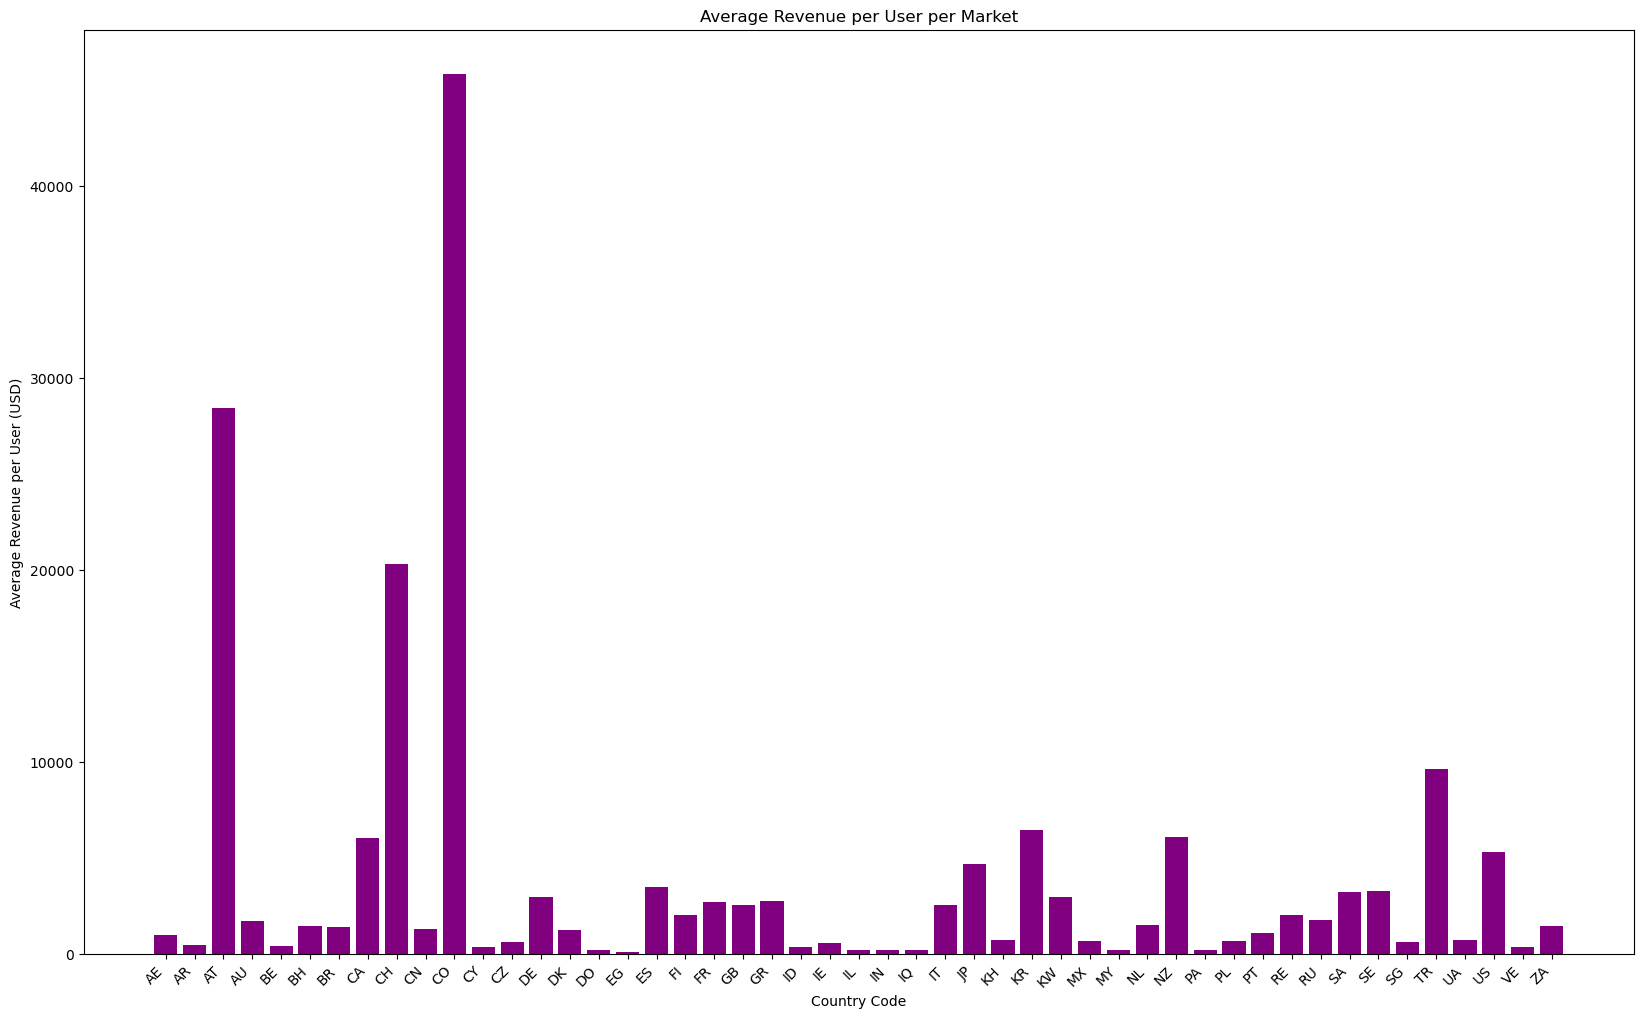

In [28]:
# Plot the results
plt.figure(figsize=(20, 12))
plt.bar(grouped_data['country_code'], grouped_data['avg_revenue_per_user'], color='purple')
plt.title('Average Revenue per User per Market')
plt.xlabel('Country Code')
plt.ylabel('Average Revenue per User (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
a_id = ['CO', 'AT', 'CH', 'US', 'CN', 'KR']

for i, r in grouped_data.iterrows():
    if r['country_code'] in a_id:
        country_code = r['country_code']
        total_revenue = r['iap_price_usd_cents']
        number_unique_accounts_purchased = r['number_unique_accounts_purchased']
        avg_revenue_per_user = r['avg_revenue_per_user']
        number_purchases = r['number_purchases_by_countries']
        total_sessions = r['total_sessions_by_countries']
        
        
        print(f"Country Code: {country_code}")
        print(f"Total Revenue: {total_revenue}")
        print(f"Total Users: {number_unique_accounts_purchased}")
        print(f"Number Purchases by Countries: {number_purchases}")
        print(f"Total Sessions by Countries: {total_sessions}")
        print(f"Avg Revenue per User per Market: {avg_revenue_per_user}\n")


Country Code: AT
Total Revenue: 28471
Total Users: 1
Number Purchases by Countries: 19
Total Sessions by Countries: 3178
Avg Revenue per User per Market: 28471.0

Country Code: CH
Total Revenue: 182774
Total Users: 9
Number Purchases by Countries: 117
Total Sessions by Countries: 2992
Avg Revenue per User per Market: 20308.222222222223

Country Code: CN
Total Revenue: 1136507
Total Users: 874
Number Purchases by Countries: 4610
Total Sessions by Countries: 674662
Avg Revenue per User per Market: 1300.3512585812357

Country Code: CO
Total Revenue: 45860
Total Users: 1
Number Purchases by Countries: 20
Total Sessions by Countries: 7358
Avg Revenue per User per Market: 45860.0

Country Code: KR
Total Revenue: 463518
Total Users: 72
Number Purchases by Countries: 536
Total Sessions by Countries: 57718
Avg Revenue per User per Market: 6437.75

Country Code: US
Total Revenue: 1314818
Total Users: 248
Number Purchases by Countries: 2345
Total Sessions by Countries: 177093
Avg Revenue per User

.CO, AT, and CH were 3 countries had the avg. per users the highest although US and CN were bigger markets. 
This is because CO country had only 1 player but purchased 458.6 dollars in 20 times, AT was the same with only 1 player but purchased 284.71 dollars in 19 times, CH had 9 players and purchased 1827.74 dollars in total 117 times.

.CO, AT, and CH were 3 countries had the avg. per users the highest although US and CN were bigger markets. 

.Average revenue per user per market don't seem helpful much but it still can show and emphasize the next potential markets after CN, US, and KR. The game should focus on advertising in those potential countries to boost the total number players.

.Also should have many interested events/functions/updates which support free players and attract them to buy small bundles/packages.